##Drive and Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import glob
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import csv
import numpy as np

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.image as mpimg
from keras import models

##Data Preprocessing

James

In [ ]:
# directory = '/content/drive/MyDrive/CS/Datasets/youtube/masterlist.csv'
james_directory = '/content/drive/MyDrive/Class I/CS 4/YouTube Thumbnails/youtube/good_url_masterlist_with_youtubers.csv'
db = pd.read_csv(james_directory)
print(db.columns.values)
db

['Unnamed: 0' 'url' 'thumbnail' 'stats' 'channel']


,Unnamed: 0,url,thumbnail,stats,channel
0,0,https://www.youtube.com/watch?v=aOyaMGzCD80,https://i.ytimg.com/vi/aOyaMGzCD80/mqdefault.jpg,"['9888', '209']",UCrrG_WxXH9JA81wDTmoBqqw
1,1,https://www.youtube.com/watch?v=D6x9fNvVxyE,https://i.ytimg.com/vi/D6x9fNvVxyE/mqdefault.jpg,"['8553', '115']",UCrrG_WxXH9JA81wDTmoBqqw
2,2,https://www.youtube.com/watch?v=P_yXY-c3zu8,https://i.ytimg.com/vi/P_yXY-c3zu8/mqdefault.jpg,"['41525', '825']",UCVs6XJrJqAxnILUI7lmnMjA
3,3,https://www.youtube.com/watch?v=blifclkjZMw,https://i.ytimg.com/vi/blifclkjZMw/mqdefault.jpg,"['8697', '116']",UCxYhjxSYHTGP4PF4mzI-EMw
4,4,https://www.youtube.com/watch?v=01JNDSms95I,https://i.ytimg.com/vi/01JNDSms95I/mqdefault.jpg,"['898504', '20485']",UC1ocLlxuec5-d1X2dUSH_0w
...,...,...,...,...,...
17491,17491,https://www.youtube.com/watch?v=bIZ5_L1ru2w,https://i.ytimg.com/vi/bIZ5_L1ru2w/mqdefault.jpg,"['57819', '1961']",NaN
17492,17492,https://www.youtube.com/watch?v=uUIlb2rpIuY,https://i.ytimg.com/vi/uUIlb2rpIuY/mqdefault.jpg,"['158079', '5686']",NaN
17493,17493,https://www.youtube.com/watch?v=XKSJRulqDNA,https://i.ytimg.com/vi/XKSJRulqDNA/mqdefault.jpg,"['204460', '8922']",NaN
17494,17494,https://www.youtube.com/watch?v=clcN3OA8SNw,https://i.ytimg.com/vi/clcN3OA8SNw/mqdefault.jpg,"['177212', '9805']",NaN


Gunner

In [ ]:
gunner_directory = '/content/drive/MyDrive/CS/Datasets/youtube/masterlist.csv'
db = pd.read_csv(gunner_directory)
db

FileNotFoundError: ignored

Drop all problematic thumbnail urls

In [ ]:
working_df = db

Indexes of problematic URLs for masterlist_with_youtubers.csv:

[26, 160, 190, 750, 752, 1513, 1622, 1739, 1772, 2136, 2612, 3041, 3420, 3619, 3746, 3982, 4014, 4123, 5301, 6021, 6059, 6089, 6276, 6282, 7451, 8037, 8378, 8671, 9110, 9217, 9402, 9425, 9448, 10094, 11101, 11791]


In [ ]:
from urllib.parse import urlparse
import urllib.request
from PIL import Image
import numpy as np

def get_pixels(url):
  # retrieve image and save it under pseudo
  urllib.request.urlretrieve((url),"thumbnail.png")
  urllib.request.urlcleanup()
  # use PIL library to process image
  im = Image.open(r"thumbnail.png") # open image
  pixels = list(im.getdata()) # generate list values for each pixle
  width, height = im.size # store height and width of image
  pixels = [pixels[i * width:(i + 1) * width] for i in range(height)] # split the pixel array into rows
  return pixels

In [ ]:
col_vals = []

for y in range(180):
  for x in range(320):
    col_vals.append(str(x) + "x" + str(y))

print(col_vals)

pixel_df = pd.DataFrame(columns=col_vals)
pixel_df

['0x0', '1x0', '2x0', '3x0', '4x0', '5x0', '6x0', '7x0', '8x0', '9x0', '10x0', '11x0', '12x0', '13x0', '14x0', '15x0', '16x0', '17x0', '18x0', '19x0', '20x0', '21x0', '22x0', '23x0', '24x0', '25x0', '26x0', '27x0', '28x0', '29x0', '30x0', '31x0', '32x0', '33x0', '34x0', '35x0', '36x0', '37x0', '38x0', '39x0', '40x0', '41x0', '42x0', '43x0', '44x0', '45x0', '46x0', '47x0', '48x0', '49x0', '50x0', '51x0', '52x0', '53x0', '54x0', '55x0', '56x0', '57x0', '58x0', '59x0', '60x0', '61x0', '62x0', '63x0', '64x0', '65x0', '66x0', '67x0', '68x0', '69x0', '70x0', '71x0', '72x0', '73x0', '74x0', '75x0', '76x0', '77x0', '78x0', '79x0', '80x0', '81x0', '82x0', '83x0', '84x0', '85x0', '86x0', '87x0', '88x0', '89x0', '90x0', '91x0', '92x0', '93x0', '94x0', '95x0', '96x0', '97x0', '98x0', '99x0', '100x0', '101x0', '102x0', '103x0', '104x0', '105x0', '106x0', '107x0', '108x0', '109x0', '110x0', '111x0', '112x0', '113x0', '114x0', '115x0', '116x0', '117x0', '118x0', '119x0', '120x0', '121x0', '122x0', '1

,0x0,1x0,2x0,3x0,4x0,5x0,6x0,7x0,8x0,9x0,...,310x179,311x179,312x179,313x179,314x179,315x179,316x179,317x179,318x179,319x179


In [ ]:
import time

for (index, row) in working_df.iterrows():
  back = []
  response = get_pixels(row["thumbnail"])
  # print(index)
  for y in response:
    for x in y:
      back.append((x[0] + x[1] + x[2])/3)

  new_row = pd.Series(back, index=pixel_df.columns)
  pixel_df = pixel_df.append(new_row,ignore_index=True)
  time.sleep(3)

pixel_df

In [ ]:
pixel_df.to_csv('/content/drive/MyDrive/Class I/CS 4/YouTube Thumbnails/youtube/Raw Pixel Data/PIXELS_FOR_masterlist_with_youtubers.csv')

In [ ]:
pixel_df

,0x0,1x0,2x0,3x0,4x0,5x0,6x0,7x0,8x0,9x0,...,310x179,311x179,312x179,313x179,314x179,315x179,316x179,317x179,318x179,319x179
0,43.333333,41.000000,48.000000,61.333333,69.000000,69.666667,72.333333,78.666667,81.666667,69.000000,...,122.666667,122.666667,121.666667,121.666667,121.666667,121.666667,121.666667,121.666667,121.666667,121.666667
1,147.333333,147.333333,148.333333,149.333333,150.333333,151.333333,152.000000,152.000000,153.000000,153.333333,...,152.333333,153.000000,149.666667,150.000000,137.000000,119.666667,112.000000,119.000000,152.000000,192.000000
2,1.666667,1.000000,0.666667,2.333333,2.333333,2.000000,1.000000,1.333333,0.666667,0.666667,...,2.000000,2.000000,0.000000,2.000000,4.000000,5.000000,5.000000,3.000000,0.000000,0.000000
3,1.333333,1.000000,1.000000,1.333333,1.333333,1.333333,1.000000,2.000000,3.333333,1.666667,...,1.000000,1.666667,1.000000,2.000000,2.333333,2.333333,1.333333,1.000000,1.333333,1.333333
4,86.333333,122.666667,112.666667,145.666667,171.000000,173.000000,149.333333,120.000000,118.666667,134.333333,...,161.000000,160.000000,157.666667,151.000000,152.000000,159.333333,167.666667,177.333333,183.666667,182.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,42.000000,41.666667,51.666667,47.000000,47.666667,45.666667,39.333333,49.000000,50.333333,44.000000,...,180.666667,180.666667,178.666667,177.666667,177.666667,181.666667,184.666667,185.666667,181.666667,177.666667
5173,116.333333,115.666667,115.666667,115.666667,115.333333,115.333333,116.333333,116.000000,113.666667,115.333333,...,116.333333,116.333333,116.333333,116.333333,116.333333,116.333333,116.333333,116.333333,116.333333,116.333333
5174,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,6.000000,10.000000,...,52.666667,52.666667,51.666667,51.666667,51.666667,52.666667,52.666667,53.666667,53.666667,53.666667
5175,82.333333,76.333333,71.333333,64.666667,59.000000,57.000000,54.000000,56.000000,64.000000,65.000000,...,238.333333,225.666667,212.666667,227.666667,221.666667,230.333333,235.333333,231.000000,243.000000,245.000000


##Access all CSVs In Drive

In [ ]:
practice_directory = '/content/drive/MyDrive/CS/Datasets/youtube/RawPixelData/Part_174.0_FINAL_PIXELS_FOR_masterlist_with_youtubers.csv'

In [ ]:
df=pd.read_csv(practice_directory)

In [ ]:
df.head()

,Unnamed: 0,0x0,1x0,2x0,3x0,4x0,5x0,6x0,7x0,8x0,...,310x179,311x179,312x179,313x179,314x179,315x179,316x179,317x179,318x179,319x179
0,0,78.000000,102.333333,74.666667,99.000000,101.333333,85.666667,84.666667,54.333333,84.333333,...,101.333333,66.666667,90.333333,92.333333,97.666667,97.333333,91.000000,73.333333,72.000000,58.000000
1,1,223.666667,223.333333,224.000000,225.000000,224.333333,224.000000,224.666667,225.000000,222.333333,...,100.666667,80.666667,69.666667,106.666667,104.000000,97.000000,85.333333,105.333333,72.666667,110.666667
2,2,146.000000,147.000000,148.333333,149.666667,152.333333,153.333333,154.666667,156.000000,144.000000,...,171.333333,193.333333,207.333333,185.333333,196.666667,173.666667,152.333333,159.333333,181.000000,194.000000
3,3,80.333333,78.333333,94.333333,93.333333,99.333333,95.333333,81.000000,80.000000,81.000000,...,179.333333,127.000000,77.000000,156.666667,55.333333,104.666667,125.000000,102.666667,112.333333,91.333333
4,4,95.666667,113.666667,117.666667,94.333333,139.666667,210.666667,220.666667,147.333333,151.000000,...,218.666667,218.666667,218.666667,218.666667,218.666667,218.666667,219.333333,219.333333,219.333333,219.333333


In [ ]:
row1 = df.iloc[10].to_numpy()
row1 = np.delete(row1, 0)

In [ ]:
data = np.reshape(row1, (320,180))

In [ ]:
print(data.shape)

(320, 180)


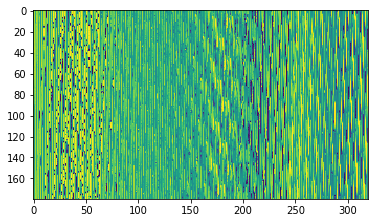

In [ ]:
plt.imshow(data.T, interpolation='nearest')
plt.show()

##Importing Updated Photos

In [ ]:
img_height = 90
img_width = 160
data_directory = '/content/drive/MyDrive/CS/Datasets/youtube/views_processed_images'

In [ ]:
early_stopping_monitor = EarlyStopping(patience=10)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height, img_width), 
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  
  )

Found 17454 files belonging to 6 classes.
Using 13964 files for training.
Found 17454 files belonging to 6 classes.
Using 3490 files for validation.


##Building CNN

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(6)
])

##Training CNN

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,
  callbacks = early_stopping_monitor
)

Epoch 1/30
437/437 [==============================] - 1358s 3s/step - loss: 1.7293 - accuracy: 0.2694 - val_loss: 1.6678 - val_accuracy: 0.2994
Epoch 2/30
437/437 [==============================] - 380s 869ms/step - loss: 1.6129 - accuracy: 0.3393 - val_loss: 1.6644 - val_accuracy: 0.3103
Epoch 3/30
437/437 [==============================] - 365s 835ms/step - loss: 1.4397 - accuracy: 0.4275 - val_loss: 1.7850 - val_accuracy: 0.3049
Epoch 4/30
437/437 [==============================] - 364s 834ms/step - loss: 1.1747 - accuracy: 0.5511 - val_loss: 2.1808 - val_accuracy: 0.2840
Epoch 5/30
437/437 [==============================] - 365s 836ms/step - loss: 0.8992 - accuracy: 0.6651 - val_loss: 2.7417 - val_accuracy: 0.2719
Epoch 6/30
437/437 [==============================] - 370s 847ms/step - loss: 0.6809 - accuracy: 0.7549 - val_loss: 3.2334 - val_accuracy: 0.2731
Epoch 7/30
437/437 [==============================] - 356s 815ms/step - loss: 0.5691 - accuracy: 0.8022 - val_loss: 3.4207 - v

##Evaluating CNN

Accuracy graph

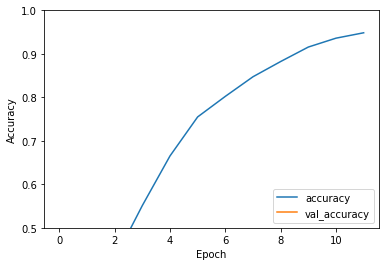

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

Testing on a photo

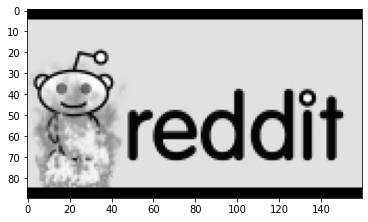

[[ 3.647814   1.8997201  1.1817561 -0.7476486 -2.0219748 -1.7050631]]
(1, 90, 160, 3)


In [ ]:
img_path = '/content/drive/MyDrive/CS/Datasets/youtube/views_processed_images/10000+/thumbnail_17461.png'

img = image.load_img(img_path, target_size=(90, 160, 1))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(model.predict(img_tensor))

print(img_tensor.shape)

Displaying convoultional layers

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1_input (InputLay  [(None, 90, 160, 3)]     0         
 er)                                                             
                                                                 
 rescaling_1 (Rescaling)     (None, 90, 160, 3)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 88, 158, 64)       1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 44, 79, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 77, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 38, 32)       0  

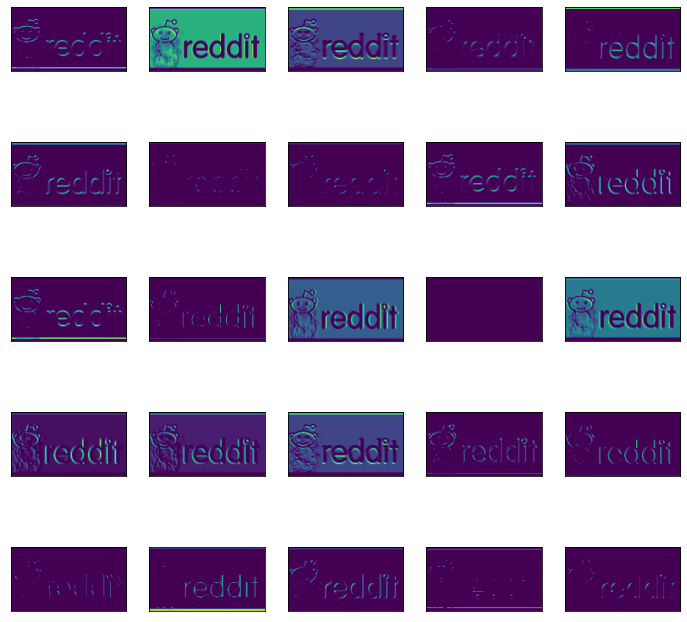

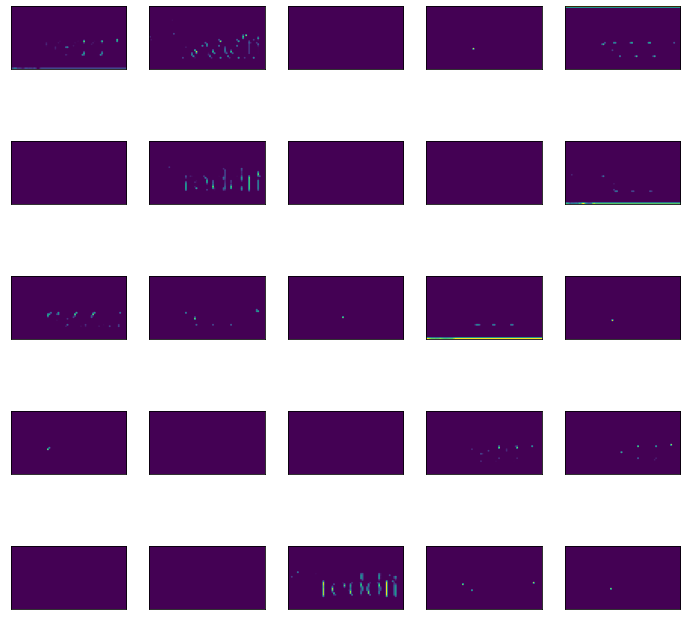

complete


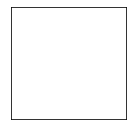

In [ ]:
#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
from keras.models import Model

conv_layer_index = [1, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 180, 180. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img(img_path, target_size=(90, 160)) #VGG user 180 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

columns = 5
rows = 5
for ftr in feature_output:
    #pos = 1
    try:
      fig=plt.figure(figsize=(12, 12))
      for i in range(1, 26):
          fig =plt.subplot(rows, columns, i)
          fig.set_xticks([])  #Turn off axis
          fig.set_yticks([])
          plt.imshow(ftr[0, :, :, i-1])
          #pos += 1
    except IndexError:
      print("complete")
      
    plt.show()